In [1]:
import sys
import os
sys.path.insert(0, os.path.join(os.getcwd(), '../core'))
import kaggle_support as kgs
import importlib
import matplotlib.pyplot as plt
import numpy as np
import cupy as cp
from dataclasses import dataclass, field, fields
import pack_cuda
import pack_vis
import pack_cost
import copy
import time
import pack_ga
from IPython.display import HTML, display, clear_output
kgs.set_float32(False)


local
local
stop final relax at some point


In [2]:
%load_ext pyinstrument

stop final relax at some point
[[JiggleRandomTree(comment='', max_xy_move=0.05, max_theta_move=0.5235987755982988), 'JiggleTreeSmall', 1.0], [JiggleRandomTree(comment='', max_xy_move=0.1, max_theta_move=3.141592653589793), 'JiggleTreeBig', 1.0]]


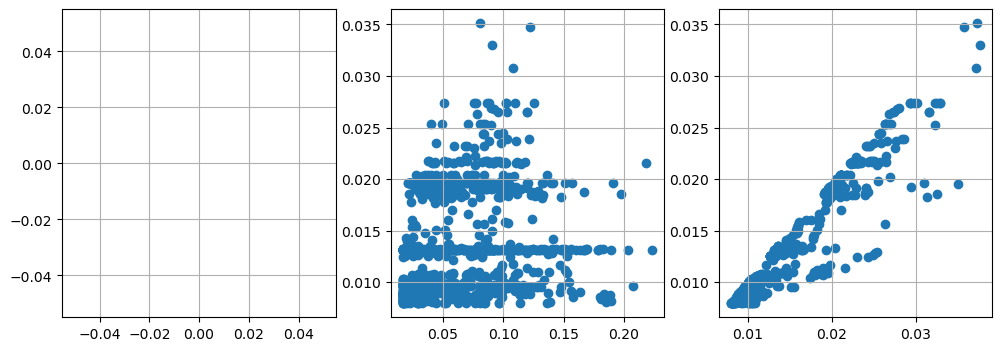

Generation 0, Trees 2, Best cost: 0.00794730, Est: 0.39736507, h: 0.628951
[[0.62895147]]


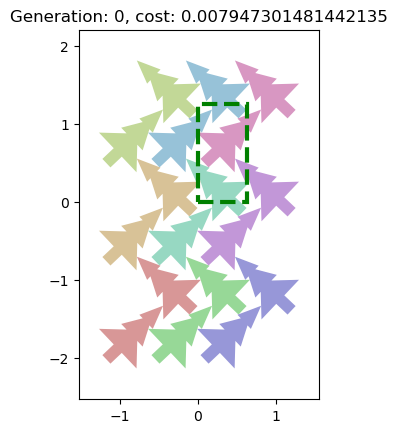

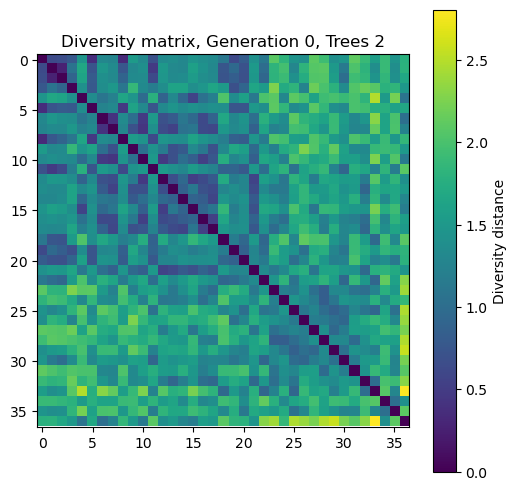

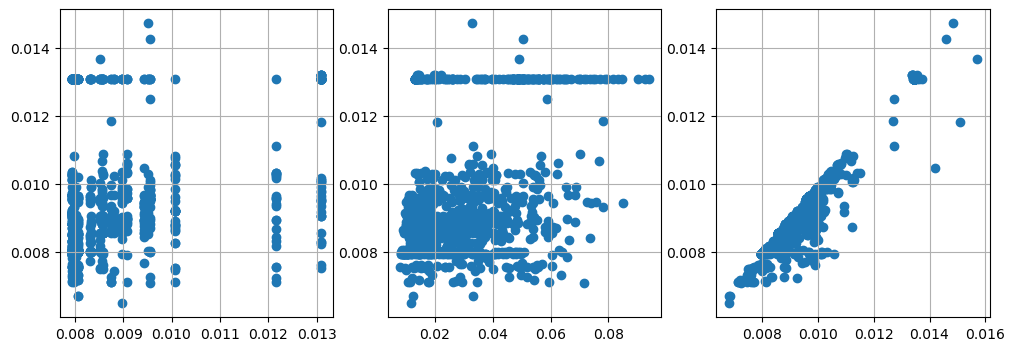

Generation 1, Trees 2, Best cost: 0.00649042, Est: 0.32452117, h: 0.568155
[[0.56815454]]


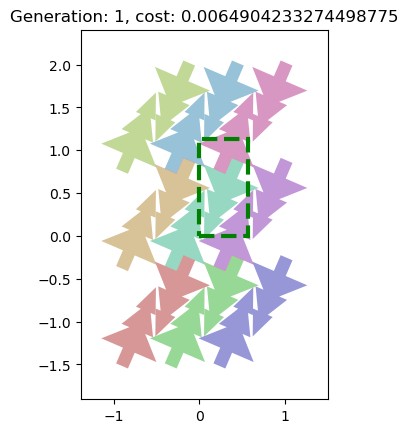

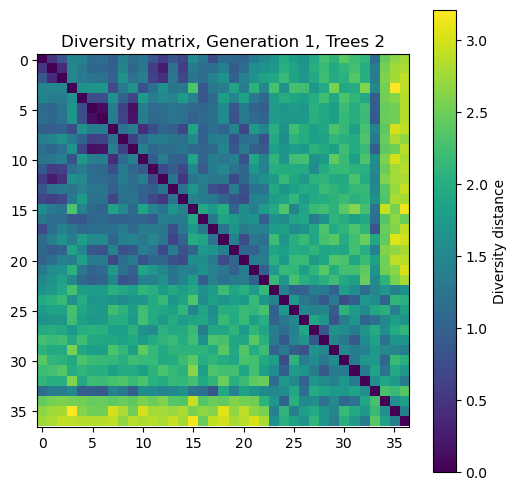

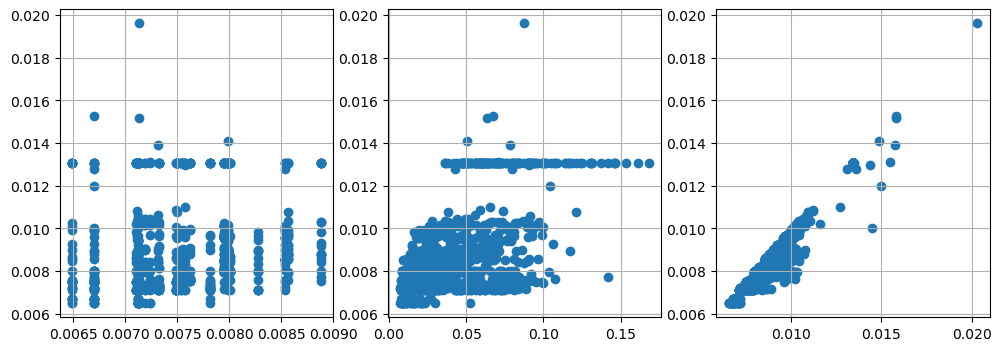

Generation 2, Trees 2, Best cost: 0.00649042, Est: 0.32452117, h: 0.568154
[[0.5681545]]


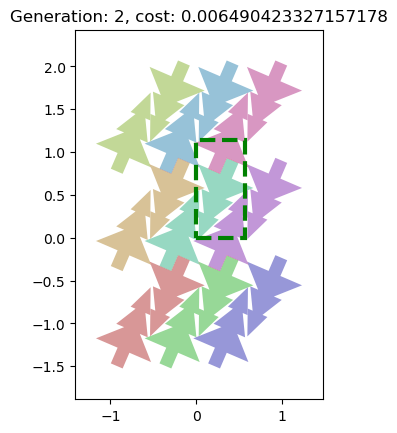

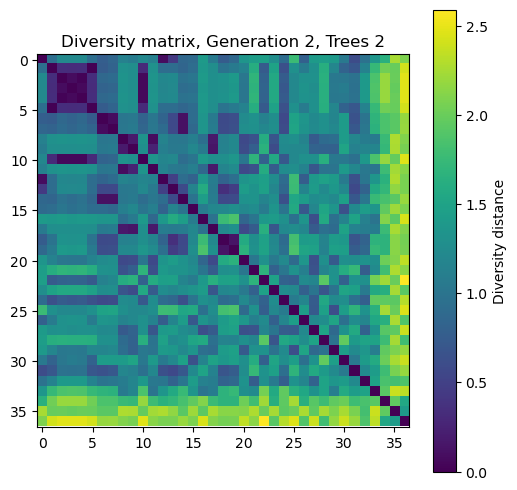

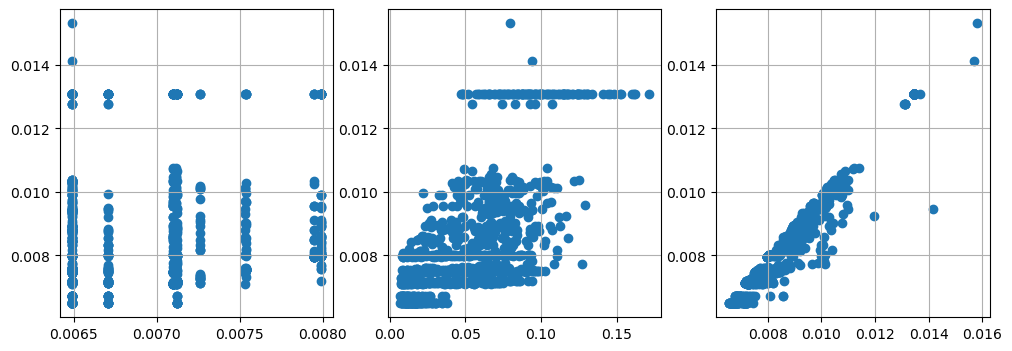

Generation 3, Trees 2, Best cost: 0.00649042, Est: 0.32452117, h: 0.568154
[[0.5681545]]


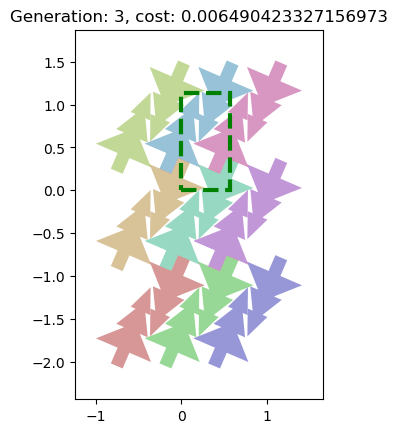

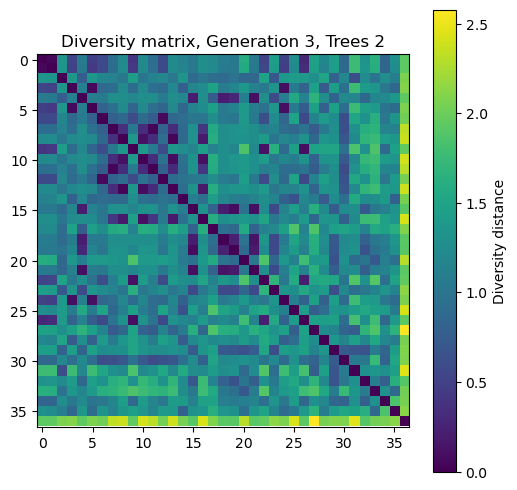

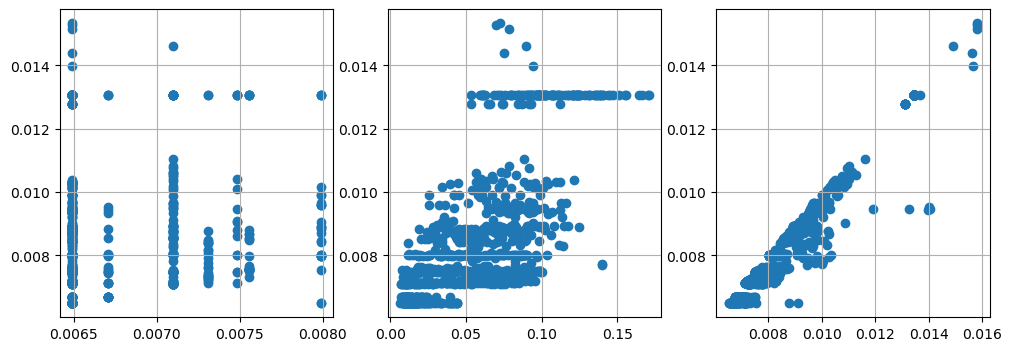

Generation 4, Trees 2, Best cost: 0.00649042, Est: 0.32452117, h: 0.568154
[[0.5681545]]


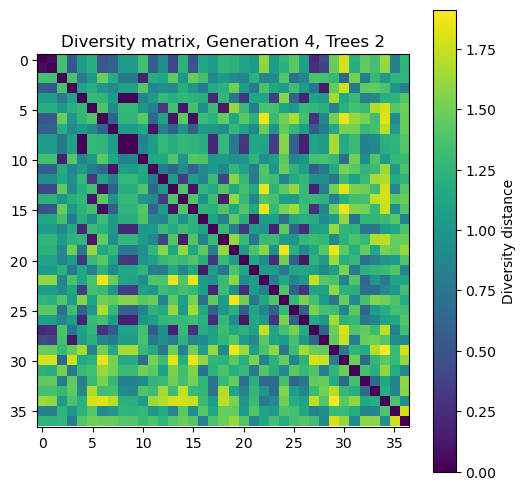

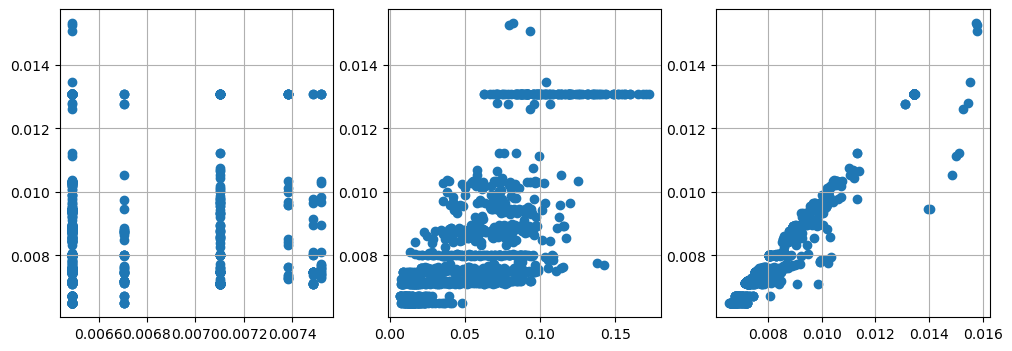

Generation 5, Trees 2, Best cost: 0.00649042, Est: 0.32452117, h: 0.568154
[[0.5681545]]


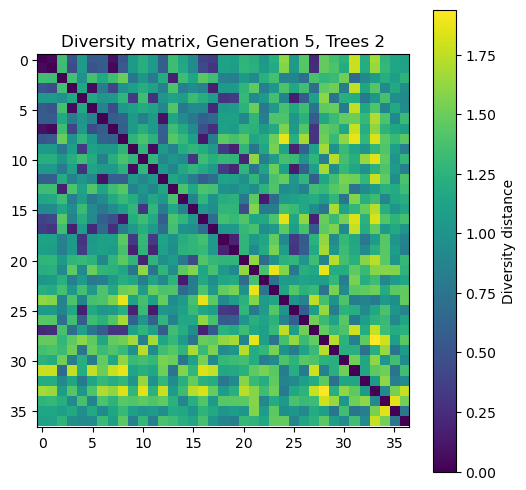

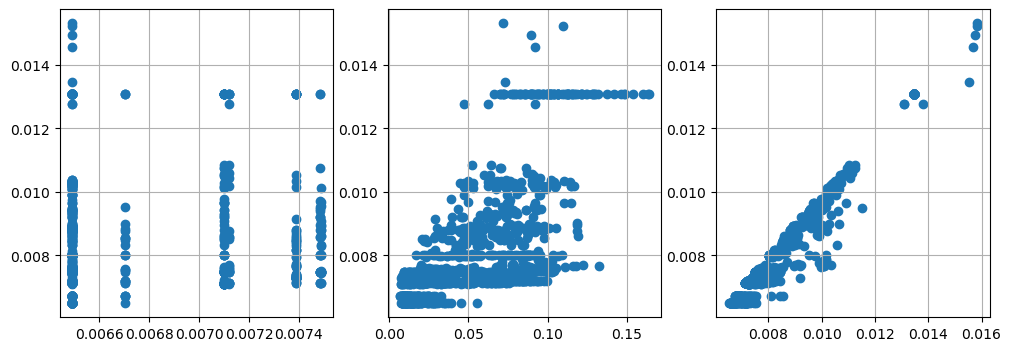

Generation 6, Trees 2, Best cost: 0.00649042, Est: 0.32452117, h: 0.568154
[[0.5681545]]


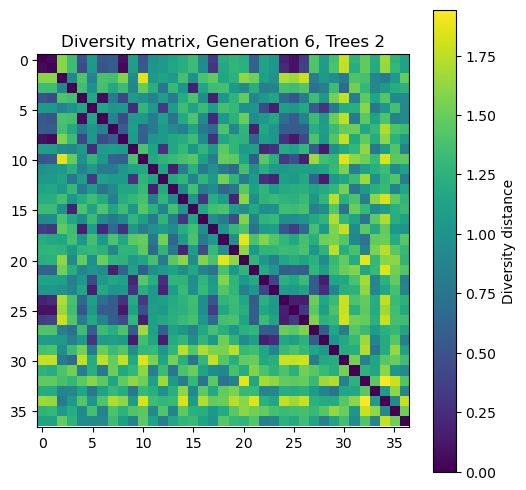

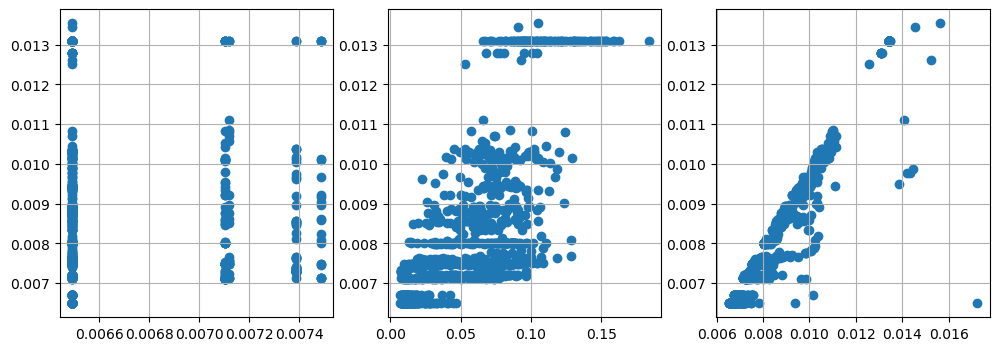

Generation 7, Trees 2, Best cost: 0.00649042, Est: 0.32452117, h: 0.568154
[[0.5681545]]


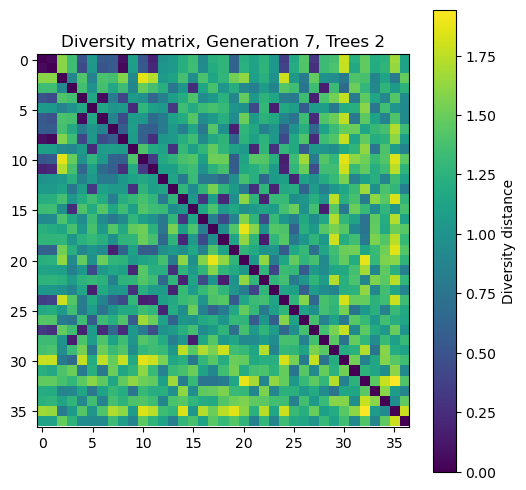

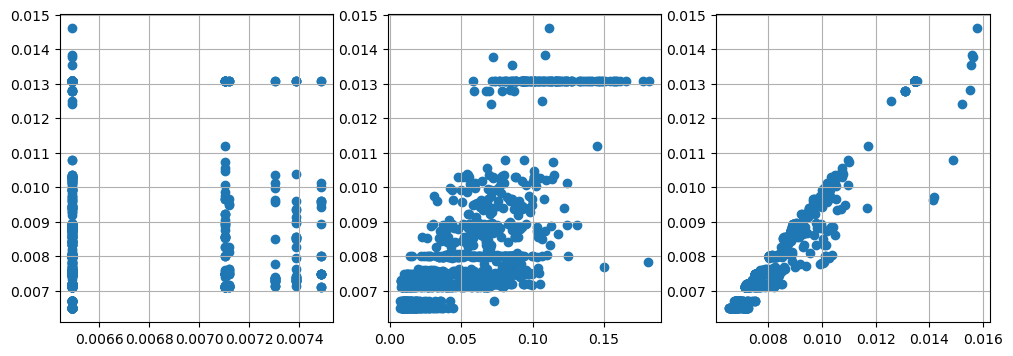

Generation 8, Trees 2, Best cost: 0.00649042, Est: 0.32452117, h: 0.568154
[[0.5681545]]


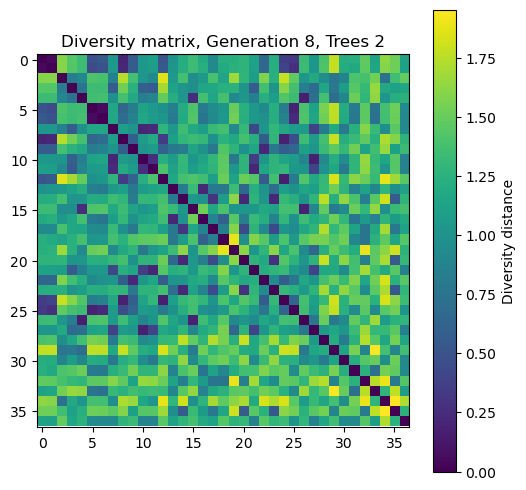

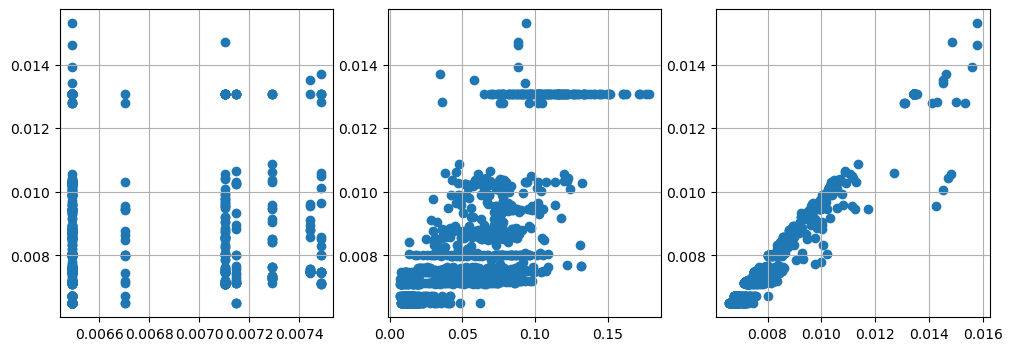

Generation 9, Trees 2, Best cost: 0.00649042, Est: 0.32452117, h: 0.568154
[[0.5681545]]


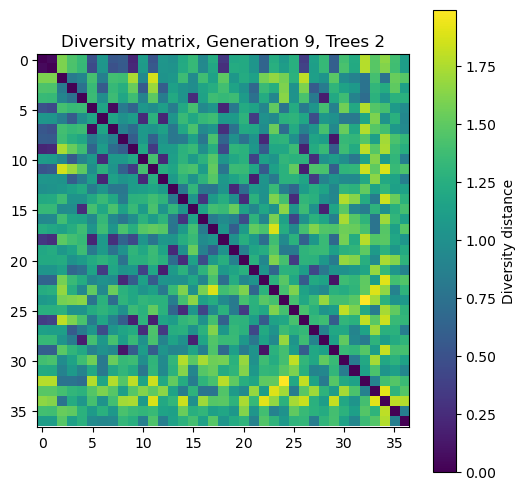

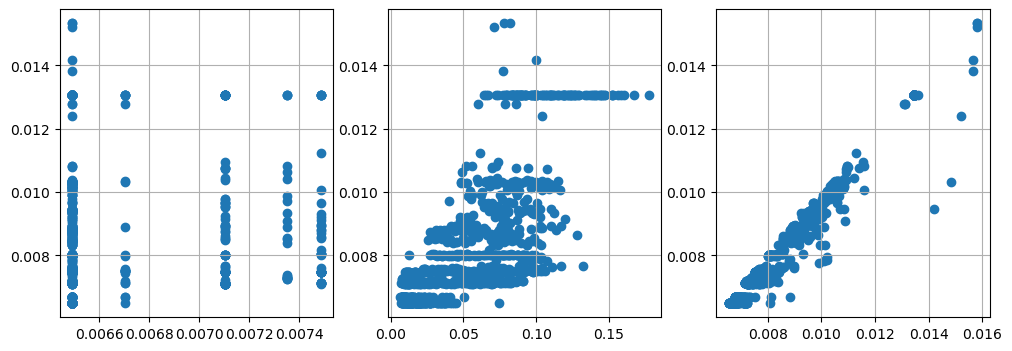

Generation 10, Trees 2, Best cost: 0.00649042, Est: 0.32452117, h: 0.568154
[[0.5681545]]


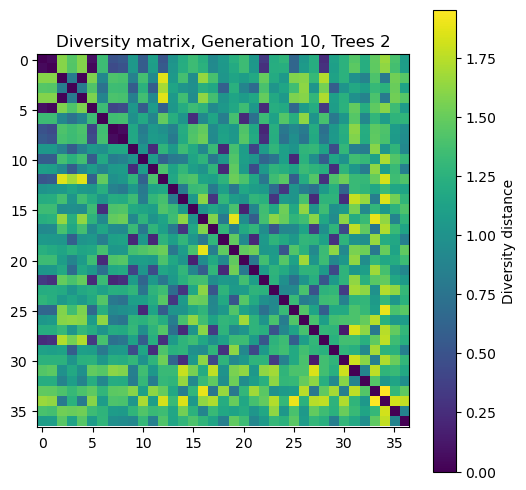

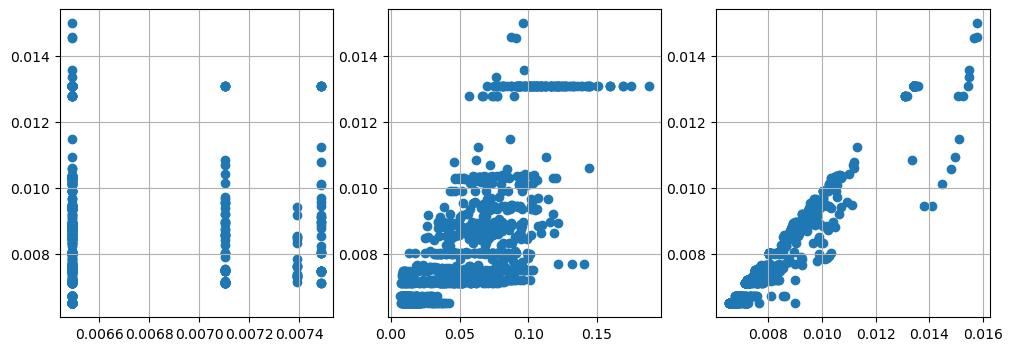

Generation 11, Trees 2, Best cost: 0.00649042, Est: 0.32452117, h: 0.568154
[[0.5681545]]


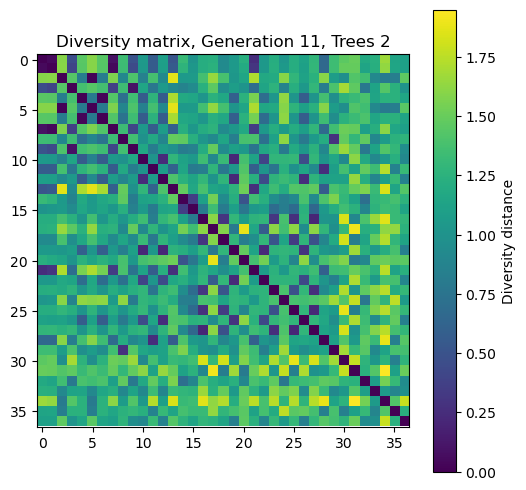

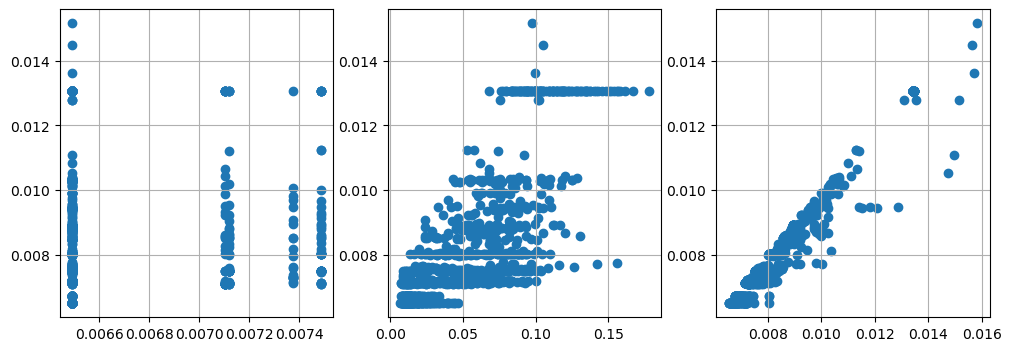

Generation 12, Trees 2, Best cost: 0.00649042, Est: 0.32452117, h: 0.568154
[[0.5681545]]


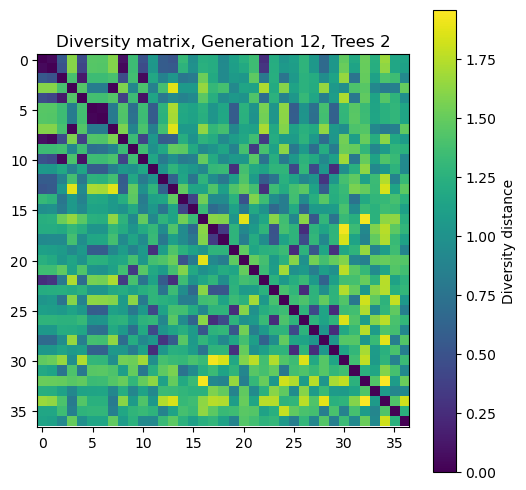

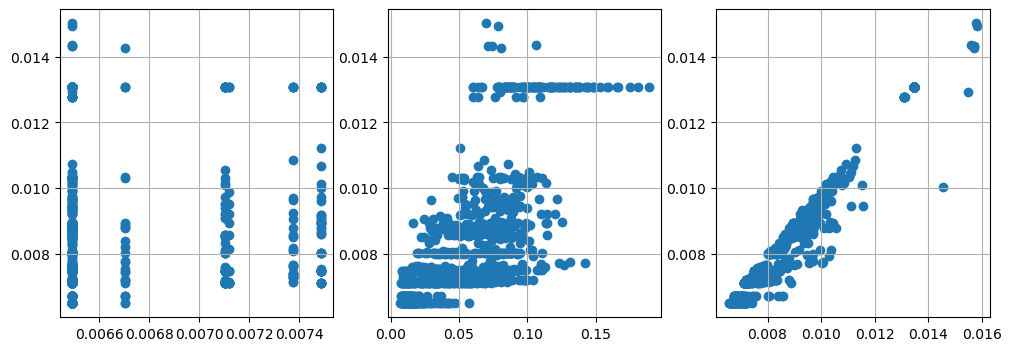

Generation 13, Trees 2, Best cost: 0.00649042, Est: 0.32452117, h: 0.568154
[[0.5681545]]


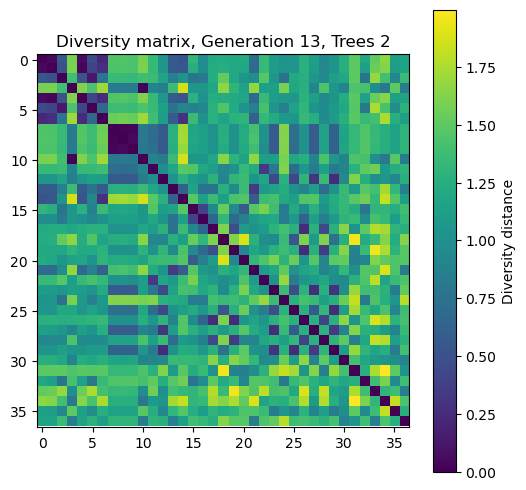

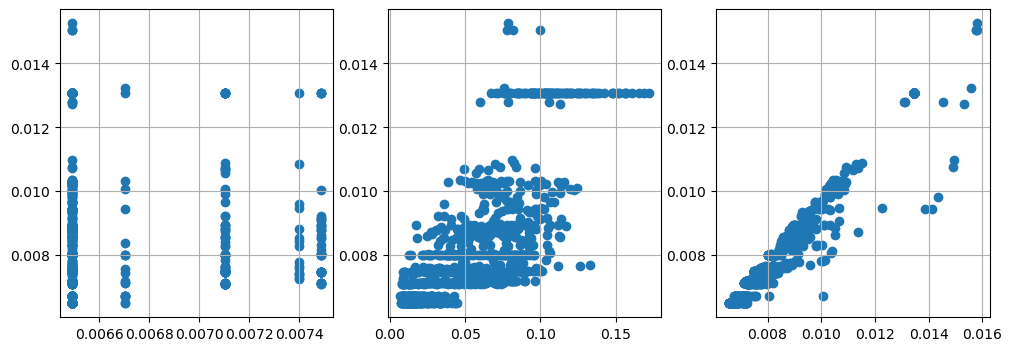

Generation 14, Trees 2, Best cost: 0.00649042, Est: 0.32452117, h: 0.568154
[[0.5681545]]


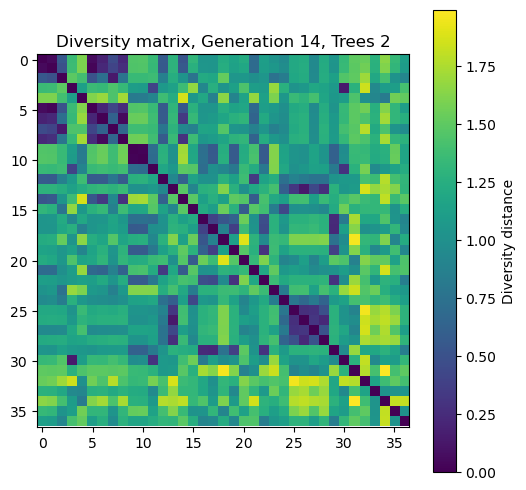

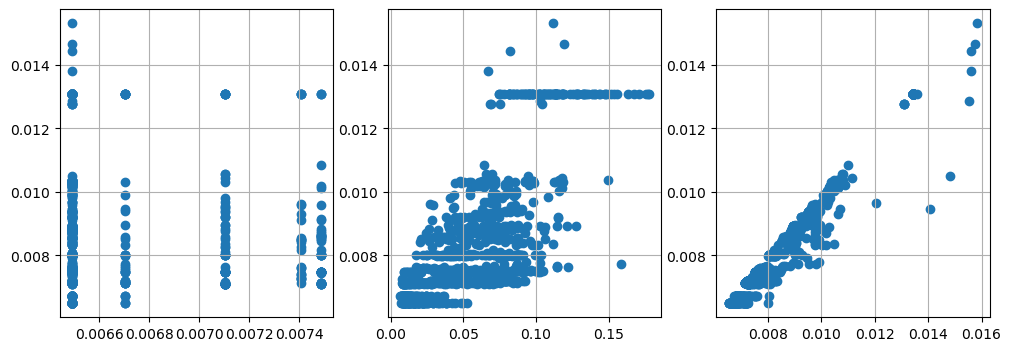

Generation 15, Trees 2, Best cost: 0.00649042, Est: 0.32452117, h: 0.568154
[[0.5681545]]


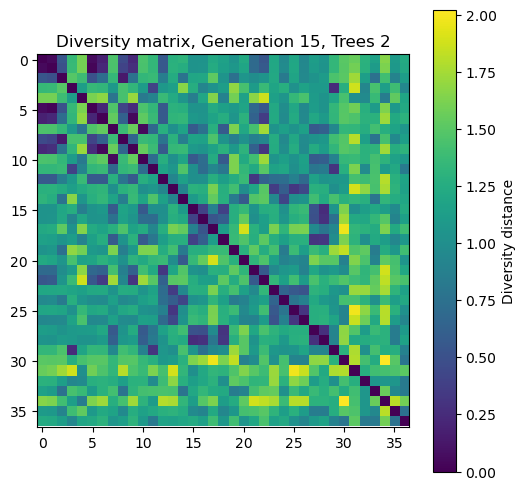

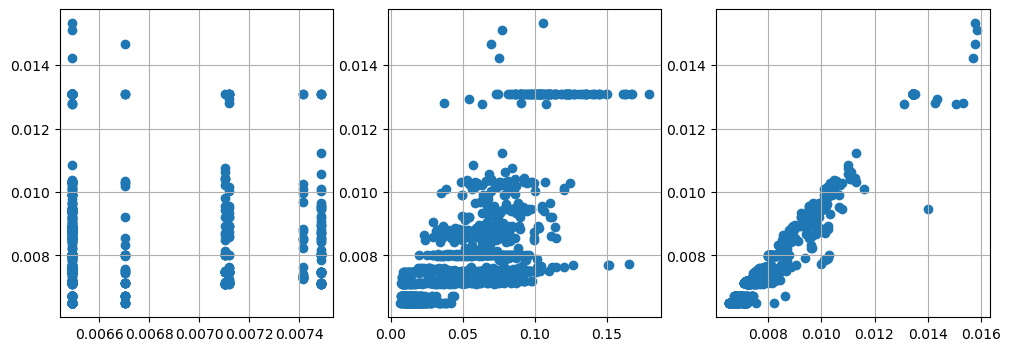

Generation 16, Trees 2, Best cost: 0.00649042, Est: 0.32452117, h: 0.568154
[[0.5681545]]


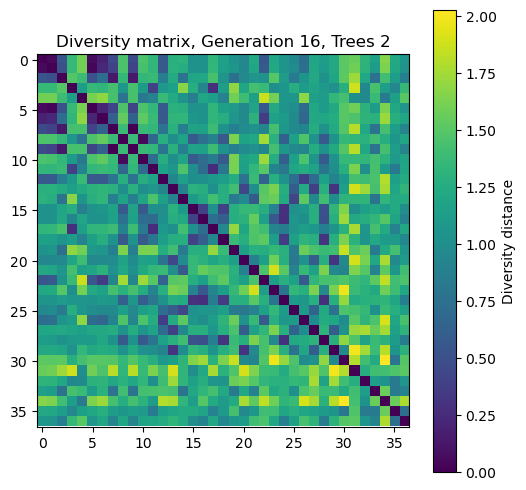

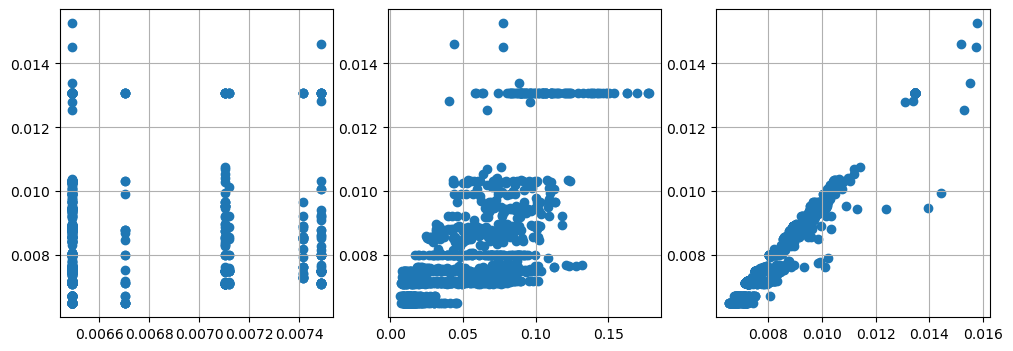

Generation 17, Trees 2, Best cost: 0.00649042, Est: 0.32452117, h: 0.568154
[[0.5681545]]


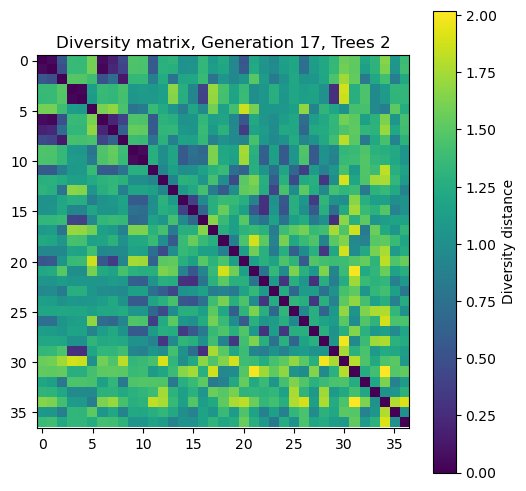

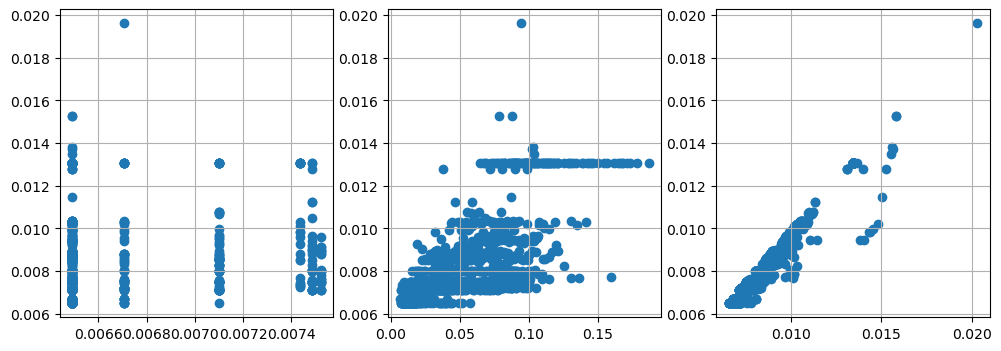

Generation 18, Trees 2, Best cost: 0.00649042, Est: 0.32452117, h: 0.568154
[[0.5681545]]


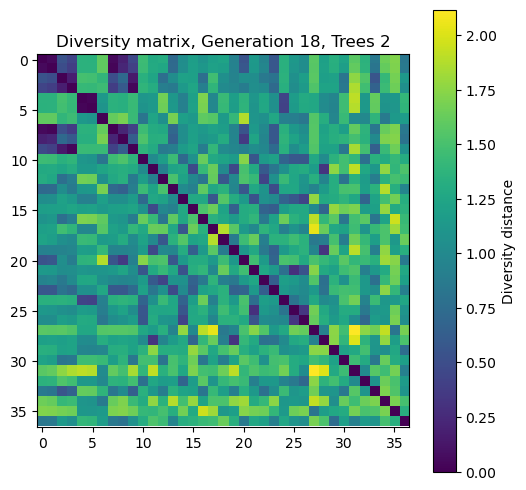

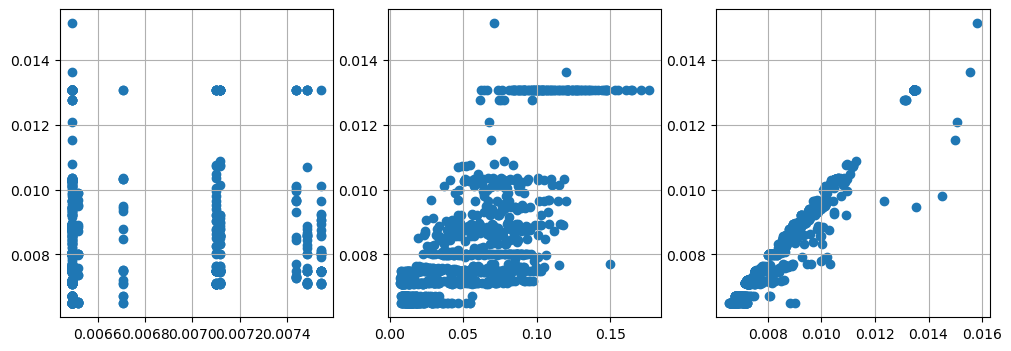

Generation 19, Trees 2, Best cost: 0.00649042, Est: 0.32452117, h: 0.568154
[[0.5681545]]


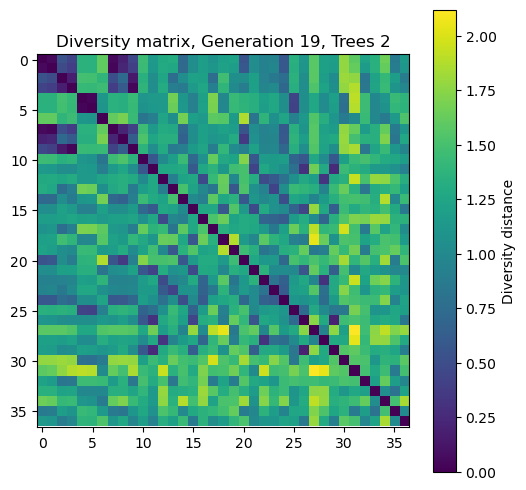

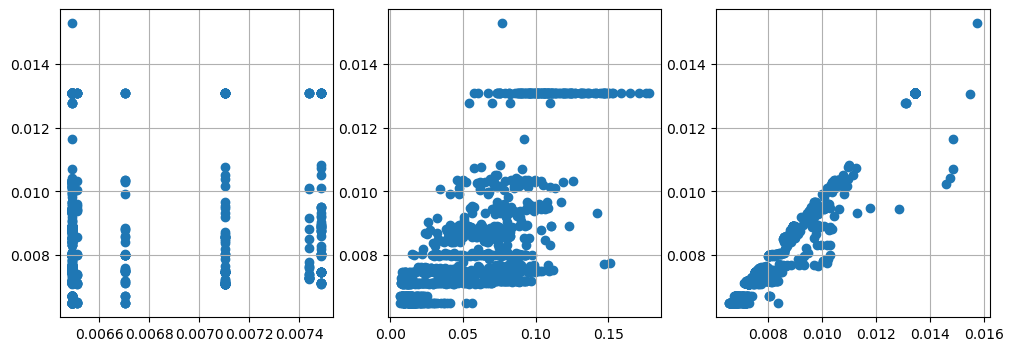

Generation 20, Trees 2, Best cost: 0.00649042, Est: 0.32452117, h: 0.568154
[[0.5681545]]


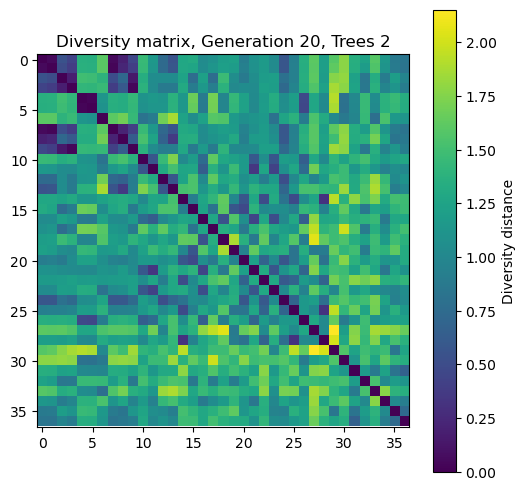

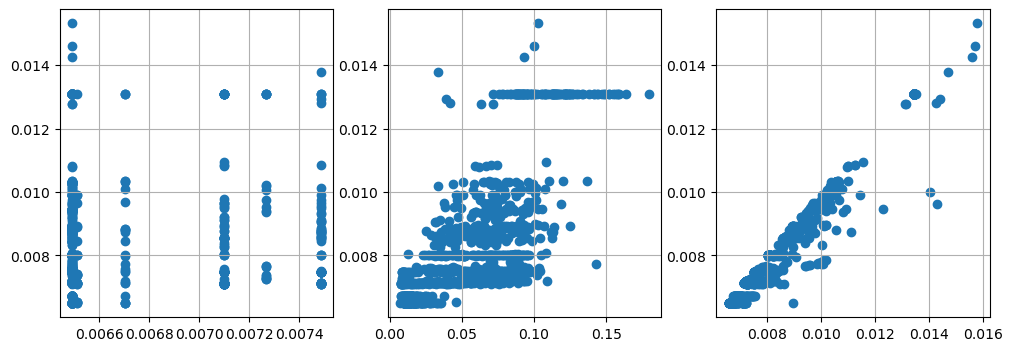

Generation 21, Trees 2, Best cost: 0.00649042, Est: 0.32452117, h: 0.568154
[[0.5681545]]


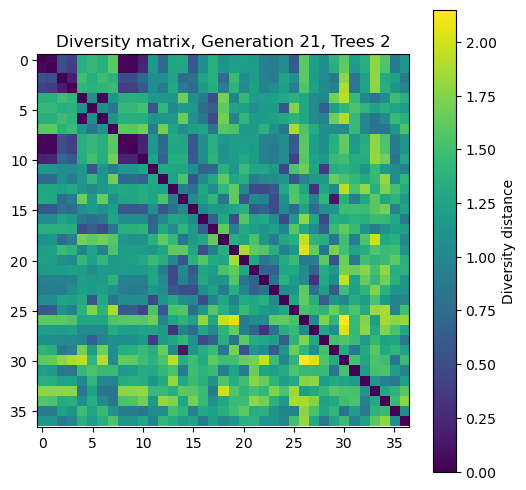

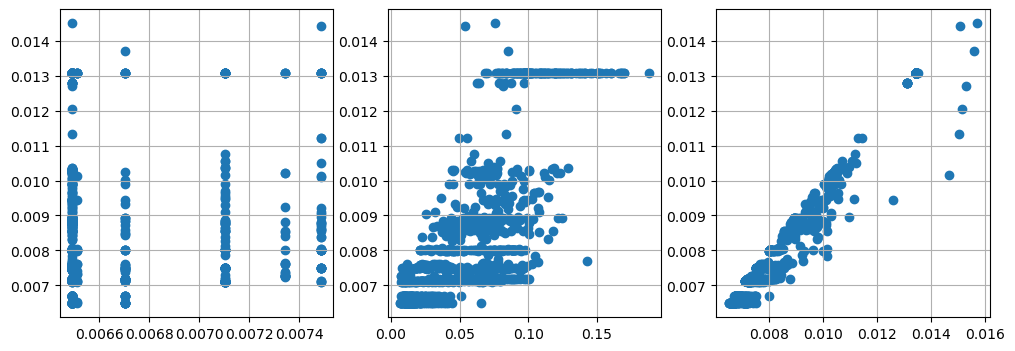

Generation 22, Trees 2, Best cost: 0.00649042, Est: 0.32452117, h: 0.568154
[[0.5681545]]


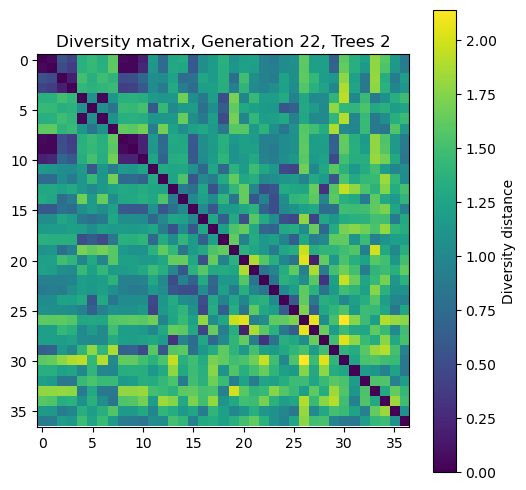

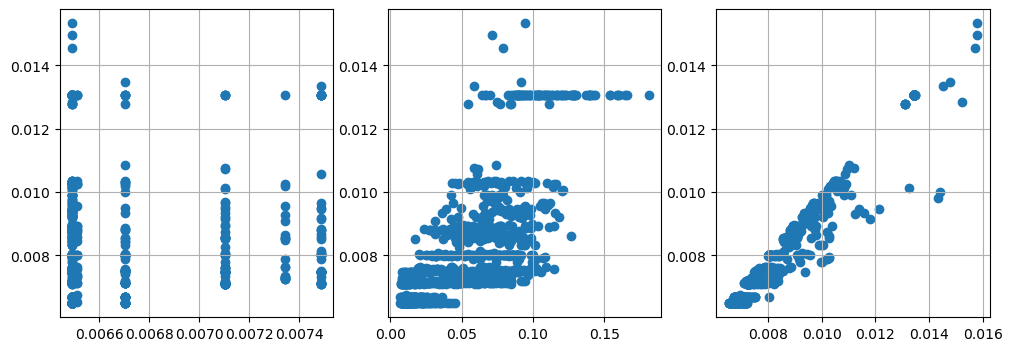

Generation 23, Trees 2, Best cost: 0.00649042, Est: 0.32452117, h: 0.568154
[[0.5681545]]


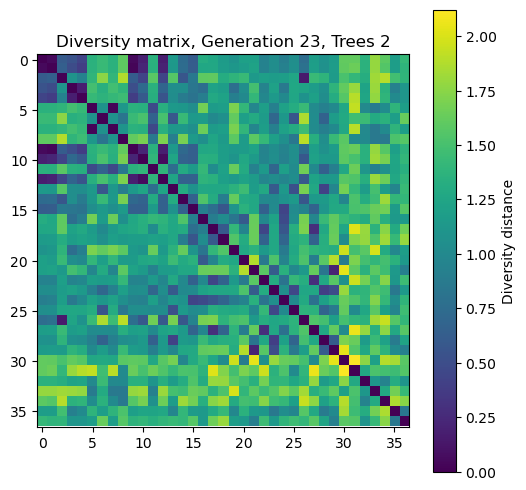

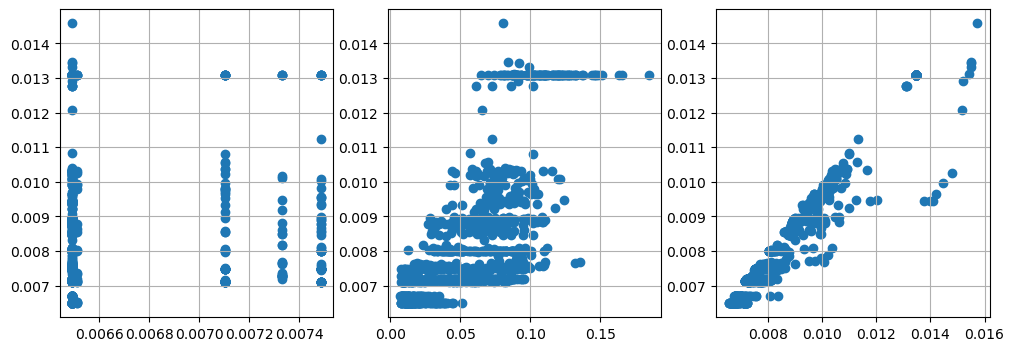

Generation 24, Trees 2, Best cost: 0.00649042, Est: 0.32452117, h: 0.568154
[[0.5681545]]


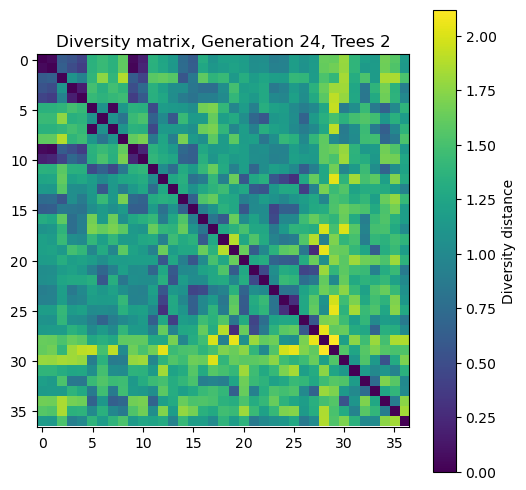

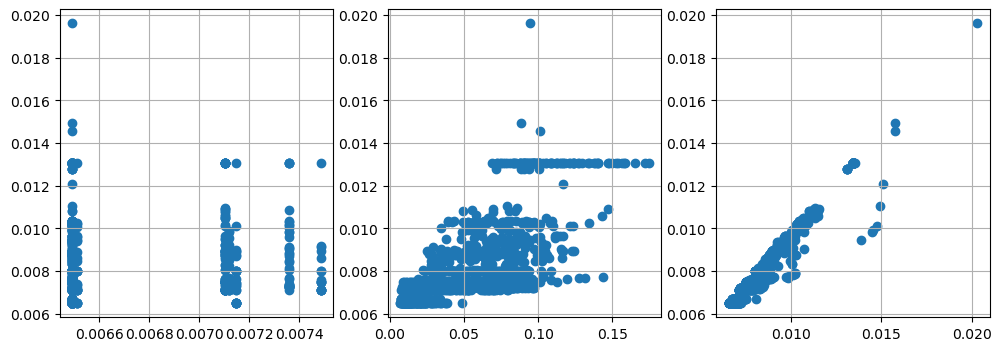

Generation 25, Trees 2, Best cost: 0.00649042, Est: 0.32452117, h: 0.568154
[[0.5681545]]


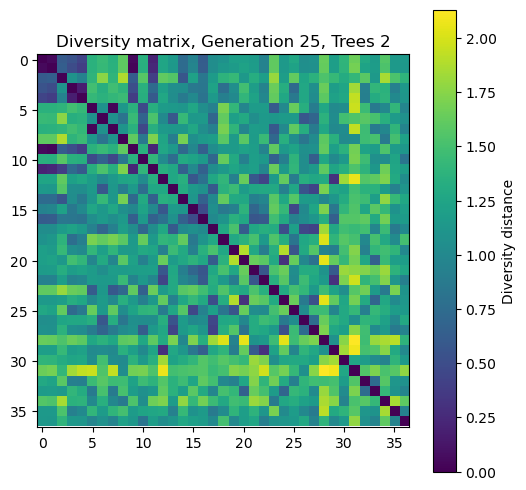

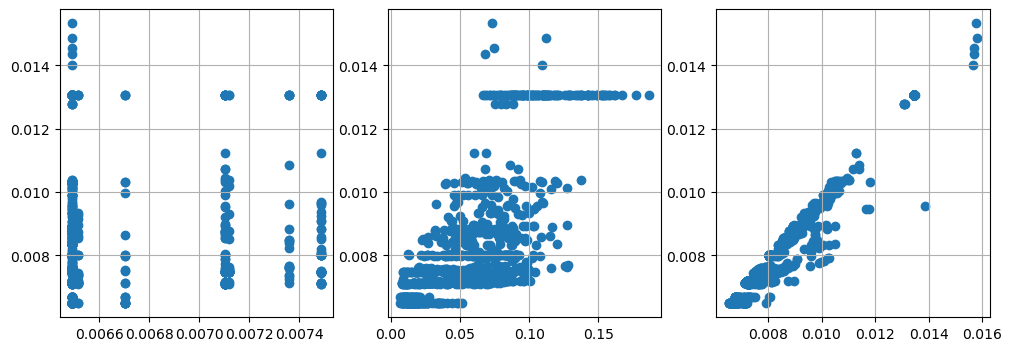

Generation 26, Trees 2, Best cost: 0.00649042, Est: 0.32452117, h: 0.568154
[[0.5681545]]


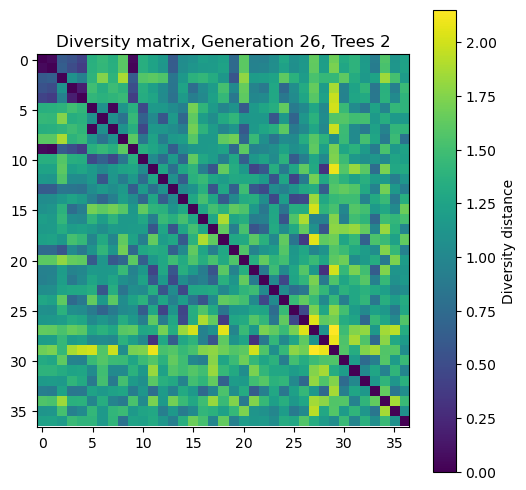

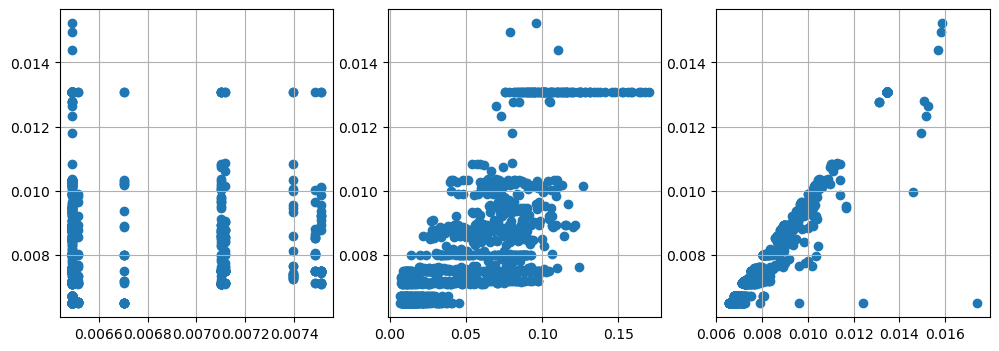

Generation 27, Trees 2, Best cost: 0.00649042, Est: 0.32452117, h: 0.568154
[[0.5681545]]


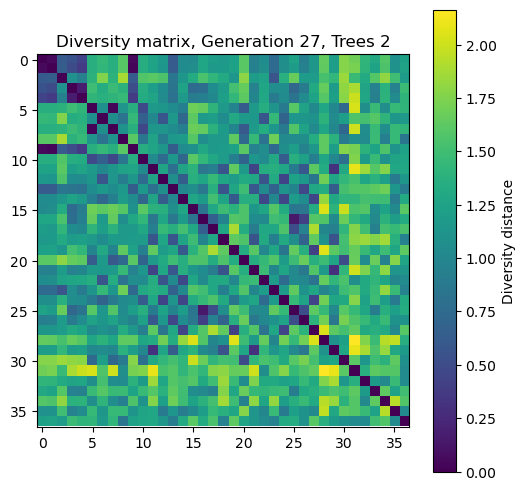

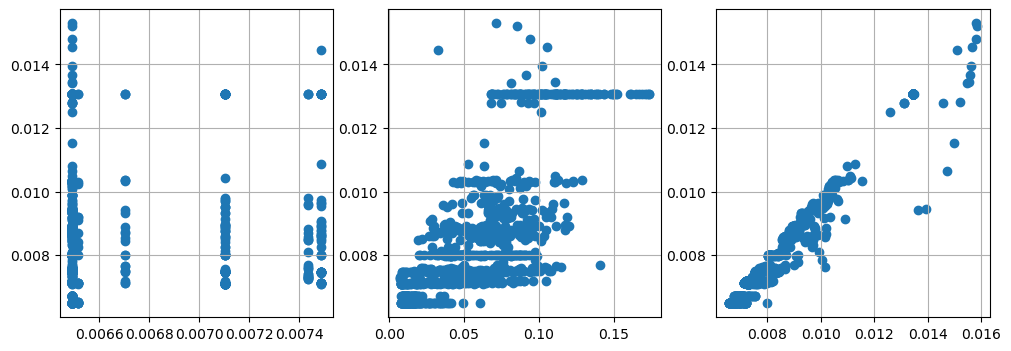

Generation 28, Trees 2, Best cost: 0.00649042, Est: 0.32452117, h: 0.568154
[[0.5681545]]


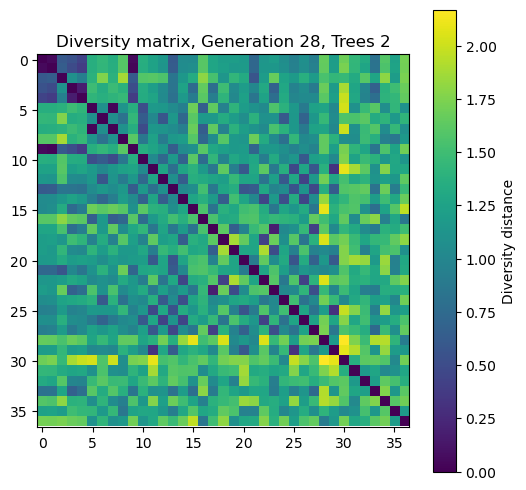

KeyboardInterrupt: 

In [ ]:
importlib.reload(pack_ga)
fastMode = False
runner = pack_ga.GA()

# fast for now
#runner.population_size = 1
#runner.selection_size = [0]
#runner.n_generations = 500

# structural
ratios = np.arange(0.3,1.01,0.1)
res = []
for r in ratios:
    print(r)
    runner.N_trees_to_do = np.array([2])
    runner.population_size = 10000
    runner.plot_fitness_predictors = False
    runner.plot_diversity_matrix = False
    runner.plot_champions = True
    runner.initializer.base_solution = kgs.SolutionCollectionLatticeFixed()
    runner.initializer.base_solution.aspect_ratios = cp.array([2.0], dtype=kgs.dtype_cp)
    runner.initializer.jiggler.duration_init = 0.
    runner.initializer.jiggler.duration_compact /= 100000
    runner.initializer.jiggler.duration_final = 0.
    runner.initializer.jiggler.plot_interval = None
    runner.initializer.jiggler.n_rounds = 1
    runner.rough_relaxers[0].plot_interval =None
    runner.rough_relaxers[0].n_iterations//=5
    runner.fine_relaxers[0].plot_interval=None
    runner.rough_relaxers[0].cost.costs.pop(1)
    runner.fine_relaxers[0].cost.costs.pop(1)
    runner.fine_relaxers[0].n_iterations//=5
    runner.n_generations = 5
    runner.fitness_cost.costs.pop(1)
    kgs.debugging_mode = 1
    kgs.profiling=False
    new_moves = []
    for i in [1,2]:
        new_moves.append(runner.move.moves[i])
    runner.move.moves = new_moves
    print(runner.move.moves)
    #runner.rough_relaxers = []
    #runner.fine_relaxers = []
    runner.run()
    res.append(runner)

In [4]:
runner.rough_relaxers[0].cost

CostCompound(comment='', scaling=1.0, costs=[AreaCost(comment='', scaling=0.01), CollisionCostOverlappingArea(comment='', scaling=1.0)])